# <h1 align="center">Data Augmentation</h1>

------

# How Computers See Images?

Computers "see" images through a process known as computer vision, utilizing algorithms and mathematical techniques to interpret and understand visual information.

## 1. Convert Image

The image is converted into a digital format, where it is represented as a grid of pixels.

## 2. Pixel Representation

Each pixel in the image is a tiny element that contains information about the color and intensity of light at a specific location. In a typical color image, each pixel is represented as a combination of red, green, and blue (RGB) values.

![Image](image_data.jpg)
![Image](image_data2.png)

## 3. Image Preprocessing

Before analysis, the image may undergo preprocessing steps to enhance its quality or extract specific features. This can include tasks such as resizing, filtering, or normalizing the pixel values.

## 4. Feature Extraction

The computer identifies distinctive features in the image, such as edges, corners, textures, shapes, or other relevant characteristics. Feature extraction helps reduce the complexity of the image while retaining essential information.

![Image](holistically_nested_edge_detection_cat.png)

## 5. Pattern Recognition

Using machine learning or computer vision algorithms, the computer recognizes patterns in the extracted features by comparing them with patterns learned during training. Common models include convolutional neural networks (CNNs).

![Image](cnn.jpg)
![Image](read_pixels1.gif)

## 6. Object Recognition

The computer categorizes objects or entities within the image based on the recognized patterns. This involves associating detected features with predefined classes or labels.

![Image](object_detection.png)

## 7. Image Interpretation

Finally, based on the identified objects and their relationships, the computer interprets the content of the image. This could involve understanding the scene, recognizing objects, or making decisions based on the visual information.

![Image](image_to_text.jpg)


In machine learning (ML), the situation when the model does not generalize well from the training data to unseen data is called overfitting. As you might know, it is one of the trickiest obstacles in applied machine learning.

The first step in tackling this problem is to actually know that your model is overfitting. That is where proper cross-validation comes in.

After identifying the problem, you can prevent it from happening by applying regularization or training with more data. Still, sometimes you might not have additional data to add to your initial dataset. Acquiring and labeling additional data points may also be the wrong path. Of course, in many cases, it will deliver better results, but in terms of work, it is often time-consuming and expensive.

That is where data augmentation (DA) comes in.


## What is Data Augmentation?

Data augmentation is a technique used to artificially expand the size of a training set by creating modified data from the existing one. It is a beneficial practice to employ data augmentation in scenarios where preventing overfitting is crucial, the initial dataset is too small, or to enhance the performance of a model.

### Importance of Data Augmentation

Data augmentation is not solely employed for preventing overfitting; it is also crucial for improving the performance of both Machine Learning (ML) and Deep Learning (DL) models. While having a large dataset is generally essential, augmenting existing data can further boost model performance.


### Data Augmentation Techniques

Various techniques can be applied to augment the initial data. For images, common techniques include:

1. **Geometric Transformations:** Random flipping, cropping, rotation, or translation of images.
2. **Color Space Transformations:** Altering RGB color channels and intensifying colors.
3. **Kernel Filters:** Sharpening or blurring an image.
4. **Random Erasing:** Deleting a part of the initial image.
5. **Mixing Images:** Combining images with each other, which may seem counterintuitive but has proven effective.

![Image](Data_Augmentation_Header.png)

## Image Data Augmentation in Deep Learning

In Deep Learning, data augmentation is a common practice to enhance model performance. Each Deep Learning framework typically provides its own set of augmentation methods or even dedicated libraries. In this section, we'll explore how to apply image augmentations using built-in methods in TensorFlow (TF) and Keras, PyTorch, and MxNet.

### Data Augmentation in TensorFlow and Keras

When working with TensorFlow or Keras as the DL framework, there are several ways to augment images:

1. **Write Custom Augmentation Pipelines:** Develop custom augmentation pipelines or layers using `tf.image`.
2. **Use Keras Preprocessing Layers:** Leverage Keras preprocessing layers for convenient augmentation.
3. **Use ImageDataGenerator:** Employ the `ImageDataGenerator` class for easy data augmentation.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing

import os
import warnings

warnings.filterwarnings("ignore")

For finer control, you can write your own augmentation pipeline. In most cases, it is useful to apply augmentations on a whole dataset, not a single image. You can implement it as follows.

In [2]:
def custom_augmentation(image):
    image = tf.image.random_brightness(image, max_delta=0.3)
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    
    return image


base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


train_datagen = ImageDataGenerator(rescale=1./255., preprocessing_function=custom_augmentation)
test_datagen = ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=20,
                                                        class_mode='binary',
                                                        target_size=(150, 150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


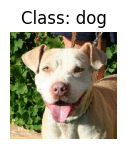

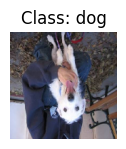

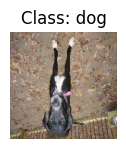

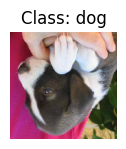

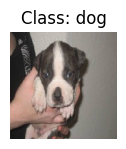

In [3]:
augmented_images, augmented_labels = train_generator.next()

class_mapping = {0: 'cat', 1: 'dog'}
class_names = [class_mapping[int(label)] for label in augmented_labels]

for i in range(5):
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 5, i+1)
    plt.imshow(augmented_images[i])
    plt.title(f"Class: {class_names[i]}")
    plt.axis("off")

plt.show()

#### Use Keras Preprocessing Layers


Found 2000 images belonging to 2 classes.


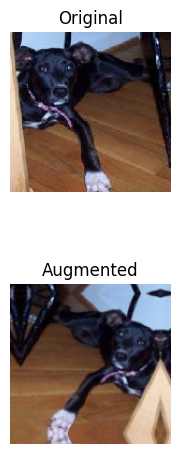

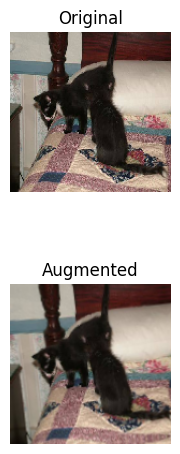

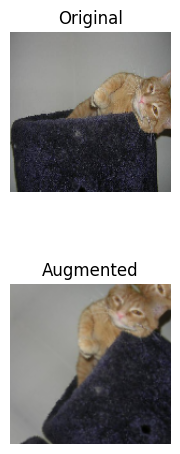

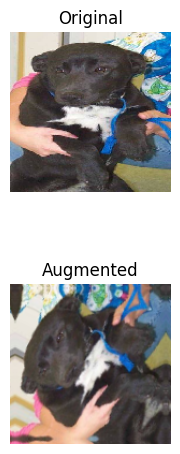

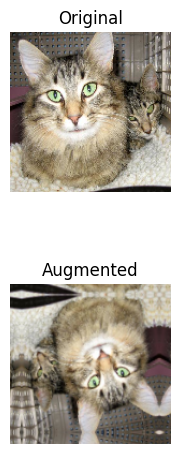

In [4]:
data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomFlip("vertical"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
])

train_datagen = ImageDataGenerator(rescale=1./255.)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

original_images, _ = train_generator.next()
augmented_images = data_augmentation(original_images, training=True)

# Display the first 5 original and augmented images side by side
for i in range(5):
    plt.figure(figsize=(12, 6))

    # Original image
    plt.subplot(2, 5, i+1)
    plt.imshow(original_images[i])
    plt.title("Original")
    plt.axis("off")

    # Augmented image
    plt.subplot(2, 5, i+6)
    plt.imshow(augmented_images[i])
    plt.title("Augmented")
    plt.axis("off")

plt.show()

#### Use ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 90,
                                   width_shift_range = 0.3,
                                   height_shift_range = 0.3,
                                   shear_range = 0.3,
                                   zoom_range = 0.3,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

In [ ]:
augmented_images, augmented_labels = train_generator.next()

class_mapping = {0: 'cat', 1: 'dog'}
class_names = [class_mapping[int(label)] for label in augmented_labels]

for i in range(5):
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 5, i+1)
    plt.imshow(augmented_images[i])
    plt.title(f"Class: {class_names[i]}")
    plt.axis("off")

plt.show()

Of course, that is just the tip of the iceberg. TensorFlow API has plenty of augmentation techniques. If you want to read more on the topic please check the official documentation or other articles.